## Financial Inclusion in Africa


### Background Information
Financial inclusion is the main obstacles to economic and human development in Africa as per studies and research conducted. Only 13.9% of the Adult population is estimated to have access to commercial bank accounts.
Acces to a bank account is a contributor to long term economic growth

## GOAl
Predict which individuals in Kenya,Uganda,Tanzania and Rwanda are most likely to have or use a bank account.   
In the process reveal insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#### Importing essential modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import platform

In [2]:
def set_seed(SEED=42):
    np.random.seed = SEED
    os.environ['PYTHONHASHSEED'] = str(SEED)
    
set_seed()
version = platform.python_version()
print("Python : ",version)
print("Pandas : ",pd.__version__)
print("NumPy : ",np.__version__)
print("Seaborn : ",sns.__version__)

Python :  3.6.9
Pandas :  1.1.5
NumPy :  1.18.5
Seaborn :  0.11.0


### Getting our data

In [3]:
train = pd.read_csv('datasets/Train_v2.csv')
test = pd.read_csv('datasets/Test_v2.csv')
variable = pd.read_csv('datasets/VariableDefinitions.csv')
Submission = pd.read_csv('datasets/SubmissionFile.csv')

#### Visualize and understand our data

In [4]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
train.shape

(23524, 13)

In [6]:
variable

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [8]:
train.bank_account.replace(['Yes','No'],[1,0],inplace = True)

In [9]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# Visualize Categorical values to establish patterns and insights

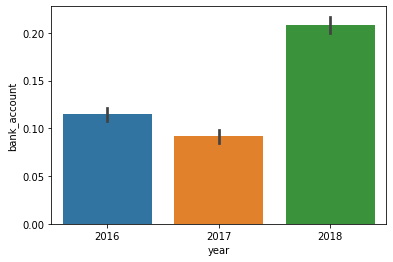

In [10]:
a = sns.barplot(x="year",y="bank_account",data=train)
a = a.set_ylabel("bank_account")

It seems that the probability of having a bank account for an individual in year 2018 is high as compared to other years

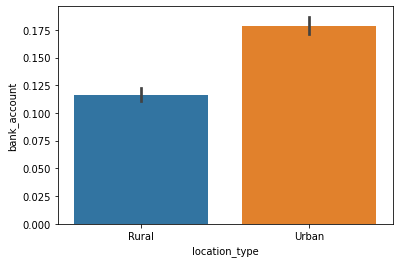

In [11]:
b = sns.barplot(x="location_type",y="bank_account",data=train)
b = b.set_ylabel("bank_account")

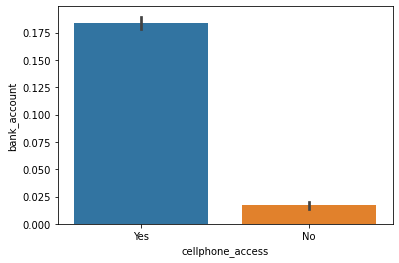

In [12]:
c = sns.barplot(x="cellphone_access",y="bank_account",data=train)
c = c.set_ylabel("bank_account")

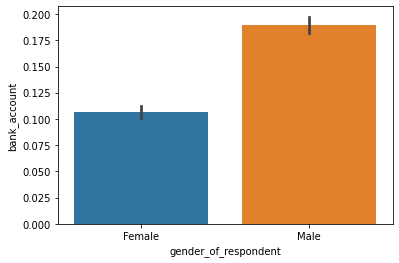

In [13]:
d = sns.barplot(x="gender_of_respondent",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

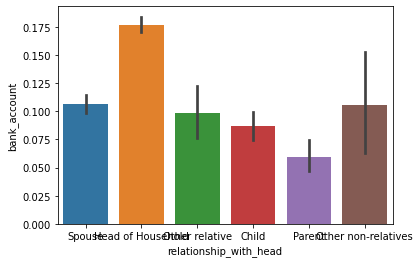

In [14]:
d = sns.barplot(x="relationship_with_head",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

This indicates that the elderly are less likely to have a bank account.
It is also clear that if a respondent is the Head of the house, it is more likely for them to have a bank account

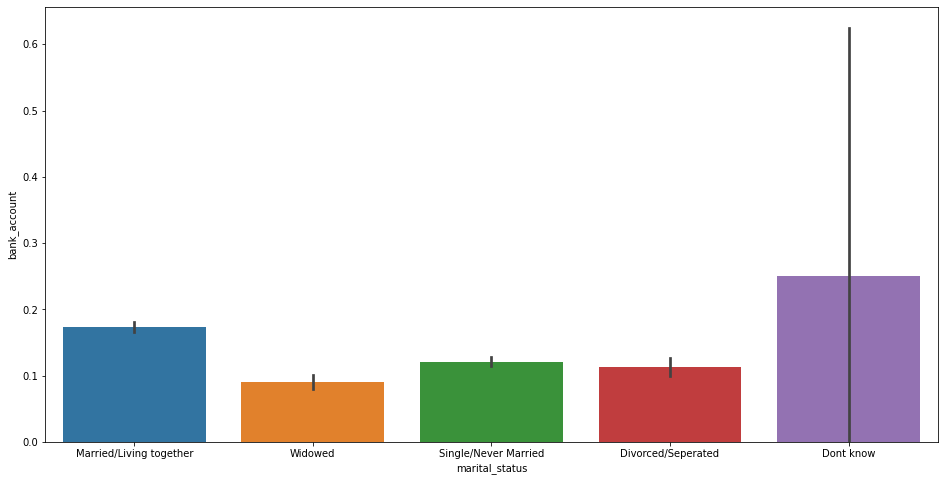

In [15]:
plt.figure(figsize=(16,8))
d = sns.barplot(x="marital_status",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

Married individuals and those who are not aware where they stand in their relationship are more likely to have a bank account.
My assumption is individuals who are not aware of their marital status are most likely to be youths already working and trying to settle

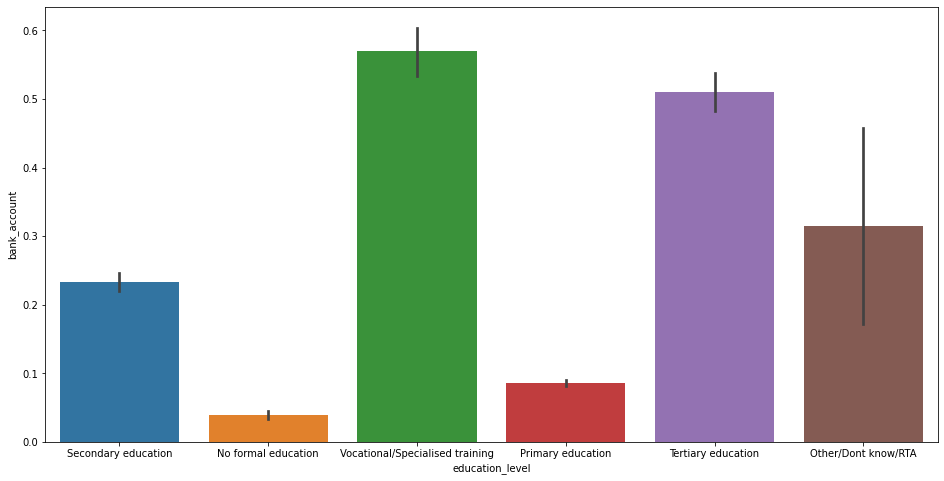

In [16]:
plt.figure(figsize=(16,8))
d = sns.barplot(x="education_level",y="bank_account",data=train)
d = d.set_ylabel("bank_account")

Individuals in tertiary and vocational training are most likely to have a bank account

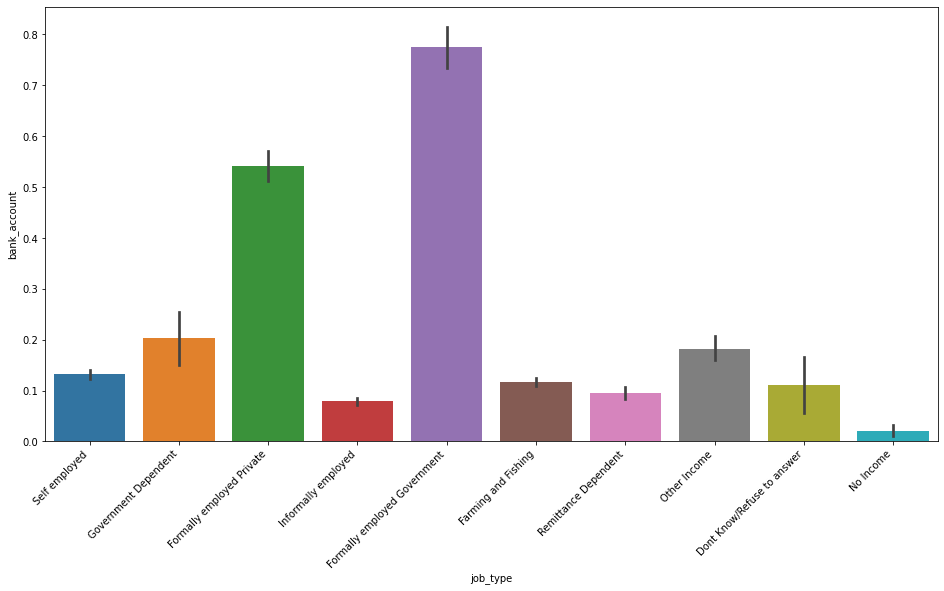

In [17]:
plt.figure(figsize=(16,8))
d = sns.barplot(x="job_type",y="bank_account",data=train)
d.set_xticklabels(d.get_xticklabels(), rotation=45, horizontalalignment='right')
d = d.set_ylabel("bank_account")



Individuals sith formal employment are more likely to have a bank account.

##### In summary we can say that an individual in formal employment, Who is the head of the house hold,with a vocation or tertially education, Married or about to get married(Dont Know-- likely in their prime youthful days),urban resident, with phone access, and surveyed in the year 2018 has 95 percent chance of having a bank account

### Feature Engineering
We concatenate the two datasets to achieve uniform feature conversions during thid exercise

In [18]:
train_len = len(train)
train_test = pd.concat([train,test],axis=0).reset_index(drop=True)

In [19]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 33610 non-null  object 
 1   year                    33610 non-null  int64  
 2   uniqueid                33610 non-null  object 
 3   bank_account            23524 non-null  float64
 4   location_type           33610 non-null  object 
 5   cellphone_access        33610 non-null  object 
 6   household_size          33610 non-null  int64  
 7   age_of_respondent       33610 non-null  int64  
 8   gender_of_respondent    33610 non-null  object 
 9   relationship_with_head  33610 non-null  object 
 10  marital_status          33610 non-null  object 
 11  education_level         33610 non-null  object 
 12  job_type                33610 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.3+ MB


In [20]:
# Descriptive Analytics
tot_len = len(train_test.columns.tolist())
print('columns present are \n {} \n No of columns is {}'.format(train_test.columns.tolist(),tot_len))
train_test.count() # total number of values per column

columns present are 
 ['country', 'year', 'uniqueid', 'bank_account', 'location_type', 'cellphone_access', 'household_size', 'age_of_respondent', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'] 
 No of columns is 13


country                   33610
year                      33610
uniqueid                  33610
bank_account              23524
location_type             33610
cellphone_access          33610
household_size            33610
age_of_respondent         33610
gender_of_respondent      33610
relationship_with_head    33610
marital_status            33610
education_level           33610
job_type                  33610
dtype: int64

In [21]:
leng = len(train_test.describe().keys().tolist())
print("No of numeric features is ", leng)
print("Number of non-numeric features are: ", tot_len-leng)

No of numeric features is  4
Number of non-numeric features are:  9


In [22]:
# visualize unique values in all the categorical features
n = train_test.nunique(axis=0)
print("unique values in each column are: \n", n)

unique values in each column are: 
 country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64


#### Categorical features that can be encoded are
    * country
    * year
    * bank_account
    * cellphone_access
    * gender_of_respondent
    * location_type

In [23]:
# Getting Dummies
def getdummies(dataset,col,pref):
    dataset = pd.get_dummies(dataset, columns = col, prefix=pref)
    return dataset

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def col_trans(data,col):
  data[col] = le.fit_transform(data[col])


In [25]:
#train_test = getdummies(train_test,["cellphone_access","location_type","gender_of_respondent"],["ce","l","g"])
col_trans(train_test,"cellphone_access")
col_trans(train_test,"location_type")

In [26]:
col_trans(train_test,"gender_of_respondent")
col_trans(train_test,"year")

In [27]:
train_test = getdummies(train_test,["year","country"],["ye","co"])

In [28]:
train_test.head()

,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,ye_0,ye_1,ye_2,co_Kenya,co_Rwanda,co_Tanzania,co_Uganda
0,uniqueid_1,1.0,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed,0,0,1,1,0,0,0
1,uniqueid_2,0.0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent,0,0,1,1,0,0,0
2,uniqueid_3,1.0,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,0,0,1,1,0,0,0
3,uniqueid_4,0.0,0,1,5,34,0,Head of Household,Married/Living together,Primary education,Formally employed Private,0,0,1,1,0,0,0
4,uniqueid_5,0.0,1,0,8,26,1,Child,Single/Never Married,Primary education,Informally employed,0,0,1,1,0,0,0


In [29]:
# lets drop the uniqueid since its insignificant
train_test.drop(columns=["uniqueid"],inplace=True)

In [30]:
def unique_vals(col):
    return pd.unique(train_test[col])

In [31]:
# Unique columns in ralationship column
print("relationship with head unique vals",unique_vals("relationship_with_head"))
print("marital_status unique vals",unique_vals("marital_status"))
print("education_level unique vals",unique_vals("education_level"))
print("job_type unique vals",unique_vals("job_type"))

relationship with head unique vals ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_status unique vals ['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
education_level unique vals ['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']
job_type unique vals ['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [32]:
# Transforming the relationship column
def col_transform(dataset,col,vals,reps): 
        dataset[col].replace(vals,reps,inplace = True)

In [33]:
col_transform(train_test,'relationship_with_head',['Spouse','Head of Household','Other relative','Child','Parent','Other non-relatives'],['S','H','O_R','C','P','N_R'])
# Transform marital_status column
col_transform(train_test,'marital_status',['Married/Living together','Widowed','Single/Never Married','Divorced/Seperated','Dont know'],['M','W','S','D','DN'])
# Transform education_level column
col_transform(train_test,'education_level',['Secondary education','No formal education','Vocational/Specialised training','Primary education','Tertiary education','Other/Dont know/RTA'],['S','N','V','P','T','ODR'])
# Transform job_type column
col_transform(train_test,'job_type',['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'],['SE','GD','FEP','IE','FEG','FF','RD','OI','DK','NI'])


In [34]:
# Get dummies of the remaining categorical features
train_test = getdummies(train_test,["relationship_with_head","marital_status","education_level","job_type"],["r","m","e","j"])

In [35]:
train_test.head()

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,ye_0,ye_1,ye_2,co_Kenya,co_Rwanda,co_Tanzania,co_Uganda,r_C,r_H,r_N_R,r_O_R,r_P,r_S,m_D,m_DN,m_M,m_S,m_W,e_N,e_ODR,e_P,e_S,e_T,e_V,j_DK,j_FEG,j_FEP,j_FF,j_GD,j_IE,j_NI,j_OI,j_RD,j_SE
0,1.0,0,1,3,24,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,0,0,5,70,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1.0,1,1,5,26,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0.0,0,1,5,34,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,1,0,8,26,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Modelling
#### Models to test
    SVC
    Decision Tree
    AdaBoost
    Random Forest
    KNN
    Logistic regression
#### Other Models That can be used
    Extra Trees
    Gradient Boosting
    Multiple layer perceprton (neural network)
    Linear Discriminant Analysis

In [36]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bank_account          23524 non-null  float64
 1   location_type         33610 non-null  int64  
 2   cellphone_access      33610 non-null  int64  
 3   household_size        33610 non-null  int64  
 4   age_of_respondent     33610 non-null  int64  
 5   gender_of_respondent  33610 non-null  int64  
 6   ye_0                  33610 non-null  uint8  
 7   ye_1                  33610 non-null  uint8  
 8   ye_2                  33610 non-null  uint8  
 9   co_Kenya              33610 non-null  uint8  
 10  co_Rwanda             33610 non-null  uint8  
 11  co_Tanzania           33610 non-null  uint8  
 12  co_Uganda             33610 non-null  uint8  
 13  r_C                   33610 non-null  uint8  
 14  r_H                   33610 non-null  uint8  
 15  r_N_R              

In [37]:
# obtain back our train and test datasets
train = train_test[:train_len]
testf = train_test[train_len:]
testf.drop(labels=["bank_account"],axis = 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
## Separate train features and label 

#train["bank_account"] = train["bank_account"].astype(int)

Y_train = train["bank_account"]

X_train = train.drop(labels = ["bank_account"],axis = 1)

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score #precision_score, recall_score,f1_score,
from xgboost import XGBClassifier

sns.set(style='white', context='notebook', palette='deep')

## Evaluating our model with
    * Without Dimension Reduction


### Lets try and Rescale our data to see its effecton overall perfomance

In [40]:
# minimal error before this action is 0.113..Random Forest
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range=(0, 1))  

X_train_rescaled = scaler.fit_transform(X_train)
testf_rescaled = scaler.fit_transform(testf)

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X_train_rescaled, Y_train, train_size=0.8,test_size=0.2, random_state=42)

#### We evaluate model perfomance using gridsearchcv to optimize our XGBClassifier
    * Finding the best hyper parameters

In [42]:
'''xgb_pipeline =XGBClassifier()
    
# param to be tested 
gbm_param_grid = {'min_child_weight': [1, 5, 7,10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6,7]
        }

# configure the gridsearch 
grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid,n_jobs = -1, verbose=10 )
# n_jobs : number of thread in parallel if -1 means max thread used
# cv : number of fold in cross-validation

# train the models 
grid_search.fit(xtrain,ytrain)'''

"xgb_pipeline =XGBClassifier()\n    \n# param to be tested \ngbm_param_grid = {'min_child_weight': [1, 5, 7,10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5,6,7]\n        }\n\n# configure the gridsearch \ngrid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid,n_jobs = -1, verbose=10 )\n# n_jobs : number of thread in parallel if -1 means max thread used\n# cv : number of fold in cross-validation\n\n# train the models \ngrid_search.fit(xtrain,ytrain)"

In [43]:
#grid_search.best_params_


In [51]:
model1 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6, max_depth = 5)# min_child_weight = 5, subsample = 1.0, colsample_bytree = 1.0, max_depth = 5,gamma=1
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(model1, xtrain, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4)
error = 1 - results.mean()
print(error)

0.11249267664055951


In [52]:
model1.fit(xtrain,ytrain)
y_pred = model1.predict(xtest)

# Get error rate
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(ytest, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, ytest)

Error rate of Random Forest classifier:  0.10775770456960676


array([[3965,  409],
       [  98,  233]])

## Summary

In [53]:
Submission.head()

,uniqueid,Bank_account
0,uniqueid_6056 x Kenya,1.0
1,uniqueid_6060 x Kenya,1.0
2,uniqueid_6065 x Kenya,0.0
3,uniqueid_6072 x Kenya,0.0
4,uniqueid_6073 x Kenya,0.0


In [54]:
test.shape

(10086, 12)

In [55]:
final_results = list(map(float,model1.predict(testf_rescaled)))
Submission['Bank_account'] = final_results
Submission['uniqueid'] = test['uniqueid'].astype(str) + ' x ' +  test['country'].astype(str)
Submission = Submission[['uniqueid','Bank_account']]

In [56]:
Submission.Bank_account.value_counts()

0.0    9367
1.0     719
Name: Bank_account, dtype: int64

In [57]:
Submission.to_csv('financial_inclusionv17.csv', index=False)

### TODO
### Remodel with dimensionality reduction --done
#### Remodel with additional feature addition
#### Remodel with optimal k value for the knn classifier -- done
## Remodel with minmaxscaling --done
## remodel with country and year dropped - done
### Use the XGBoost model
### model with optimised svc hyperparameters


# Findings1
* When our data is rescalled, the svc perfoms better than The LogisticRegression resulting to minimal misclassification error.
* Model perfomance 1. SVC 2. Logisticegression 3. KNN
* It is clear that svc perfomes better with data of uniform size.

### Findings 2
accuracy before dimensionality reduction - 0.11262262916939181   
accuracy after dimension reduction - 0.11556572923479413
Logistic regression perfoms better than SVC

Dimensionality reduction desnt improve model perfomance in this case

## Findings 3- optimal k value.21
best error - 0.11262262916939181   
error after test - 0.11576193590582073
perfomance best than the previous KNN without optimised k value but still dont beat the svc

## Findings 4 - optimised SVC
svc error before optimisation - 0.11262262916939181 
error after grid search optimisation -0.10991012873451544  
time of grid search optimisation - recommend running this in colab
## Grid searchCv optimises the SVC model and doesnt result to better perfomance..no idea why..sth must have been wrongly implemented

## xGboost perfomance looks promising..

### 0.107 and 0.109 is the difference in perfomance of first submission and my submission.

# TODO- clean notebook and find a way to improve it.
## Drop columns country and year -X
    * find best learning rate...0.3
    * Tweak the parameters further and understand the model better,..push it to the edge.
GOal - beat 0.10954578576633467  


In [47]:
ten = pd.read_csv('financial_inclusionv10.csv')
elev = pd.read_csv('financial_inclusionv11.csv')
twel = pd.read_csv('financial_inclusionv12.csv')

In [48]:
ten.Bank_account.value_counts() # 0.112433075550268


0.0    9416
1.0     670
Name: Bank_account, dtype: int64

In [49]:
elev.Bank_account.value_counts() # 0.110450128891533

0.0    9398
1.0     688
Name: Bank_account, dtype: int64

In [50]:
twel.Bank_account.value_counts() # 0.1114416022209


0.0    9400
1.0     686
Name: Bank_account, dtype: int64

In [ ]:
#0.0    9396
#1.0     690
# v13 - 0.108665476898671


In [ ]:
#v14 - 0.109656950228039

#0.0    9406
#1.0     680

In [ ]:
#0.0    9400
#1.0     686
# v15 - 0.1114416022209

In [ ]:
#0.0    9359
#1.0     727
# v16 - 0.110053539559786


In [ ]:
#0.0    9367
#1.0     719
# v17 - 0.108467182232798